## Before you begin

* The vast majority of software is serial: will not use more than one core
* Many problems are inherently sequential: **can not** use more than one core
* Some problems are parallel: **can** use more than one core
* Fewer problems are worth the effort

## Before you begin

* Parallel programming is hard
    * Harder to write and reason about
    * Harder to test
    * Harder to debug
* Try to use someone else's parallel programs

## So why are you here?

* You might be writing your own algorithms
* You might not be happy with library performance
* You might be programming for a new architecture
* You might be crazy 
* Even if you won't be writing your own parallel software, understanding how it works will help you better use somebody else's

## When to parallelize

When your algorithm, program, or worflow is:

* Lots of independent tasks **(EASY)**
* A big task that can be broken into lots of smaller independent tasks **(USUALLY EASY)**
* A big task that can be broken into smaller - but not independent - tasks **(HARD)**

## How much do you know about your computer?

<input type="checkbox" class="task-list-item-checkbox" checked="" disabled=""> Cores 
<input type="checkbox" class="task-list-item-checkbox" checked="" disabled=""> RAM 
<input type="checkbox" class="task-list-item-checkbox" checked="" disabled=""> Disk

#### Congratulations!

## What can you do with cores?

* Run lots of programs (**processes**)
* Run a single program with lots of **threads**

In [1]:
"More cores" == "Faster code"

False

### Monitor core usage with `htop`

In [2]:
import numpy
data = numpy.random.rand(int(1e7))

In [3]:
%timeit data.mean()

7.66 ms ± 668 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## PARALLEL LIBRARIES IN PYTHON

## Plotting weather data

Make a bunch of `.csv` files, corresponding to the mean global temperatures for the years 2000-2007:

In [15]:
cd temperatures/

/home/ashwin/workspace/projects/parallel-python-ASPP-2017/temperatures


In [16]:
!python prep.py

/home/ashwin/software/miniconda/envs/parallel/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
2014.csv
/home/ashwin/software/miniconda/envs/parallel/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
2012.csv
/home/ashwin/software/miniconda/envs/parallel/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
2013.csv
/home/ashwin/software/miniconda/envs/parallel/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'ref

In [17]:
!ls

2010.csv  2014.csv  dask_solution.py	 solution_multiprocessing.py
2011.csv  2015.csv  prep.py		 solution.py
2012.csv  2016.csv  process_raw_data.py
2013.csv  2017.csv  raw_data


In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

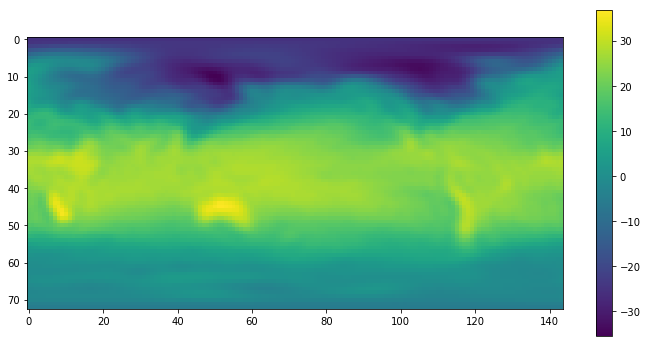

In [39]:
data = np.loadtxt('2013.csv', delimiter=',')
plt.figure(figsize=(12, 6))
plt.imshow(data)
plt.colorbar()

### Exercise

Plot the data from all the `.csv` files by writing a script `plot_weather.py`. Save your plots as `.png` files. How long does your script take to run?

## Parallel Hello World

### Quick review of `map`

In [4]:
def hello(name):
    return ("Hello, {}!".format(name))
    
friends = ["computer", "thesis", "mom"]
greetings = list(map(hello, friends))

In [5]:
print(greetings)

['Hello, computer!', 'Hello, thesis!', 'Hello, mom!']


In [6]:
import multiprocessing
p = multiprocessing.Pool(3)
greetings = p.map(hello, friends)
print(greetings)

['Hello, computer!', 'Hello, thesis!', 'Hello, mom!']


In [7]:
import time
def hello(name):
    time.sleep(3)
    return ("Hello, {}!".format(name))
    
friends = ["computer", "thesis", "mom"]
greetings = list(map(hello, friends))
print(greetings)

['Hello, computer!', 'Hello, thesis!', 'Hello, mom!']


In [8]:
import multiprocessing
p = multiprocessing.Pool(3)
greetings = p.map(hello, friends)
print(greetings)

['Hello, computer!', 'Hello, thesis!', 'Hello, mom!']
